<a href="https://colab.research.google.com/github/nak650228/YOLOv4/blob/main/itec_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

以下を参照にして作成。
最終的にはLambdaで動かして、Line Botと連携させたり、データを可視化するが、まずはここでプロトタイプを作って試す。

https://qiita.com/shoku-pan/items/bf5645894803769edc72

In [1]:
!pip install google-cloud-vision

     |████████████████████████████████| 370 kB 2.6 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 
     |████████████████████████████████| 95 kB 5.0 MB/s 
     |████████████████████████████████| 3.9 MB 49.8 MB/s 
     |████████████████████████████████| 1.1 MB 53.0 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.41.0
    Uninstalling grpcio-1.41.0:
      Successfully uninstalled grpcio-1.41.0
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.26.3
    Uninstalling google-api-core-1.26.3:
      Successfully uninstalled google-api-core-1.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-translate 1.5.0 re

In [1]:
json_path = '/content/itec-health.json'

import platform
print("python " + platform.python_version())


python 3.7.12


In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

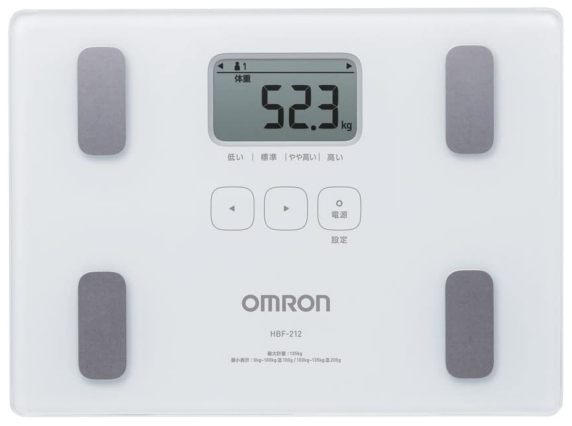

In [11]:
input_file='/content/photo.jpg'

img = cv2.imread(input_file) # input_fileは画像のパス
plt.figure(figsize=[10,10])
plt.axis('off')
plt.imshow(img[:,:,::-1])

In [12]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = json_path # json_pathは、サービスアカウントキーのパス

In [13]:
#Google cloud visionで上記画像を判断させる。

import io

from google.cloud import vision

client = vision.ImageAnnotatorClient()
with io.open(input_file, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)
response = client.document_text_detection(image=image)

print(response.text_annotations[0].description)

81
体重
523.
kg
低い | 標準 「やや高い高い
000
設定
OMRON
HBF-212
最大計量:135kg
最小表示:0kg-100kg 100g/100kg-135kg 16 2000



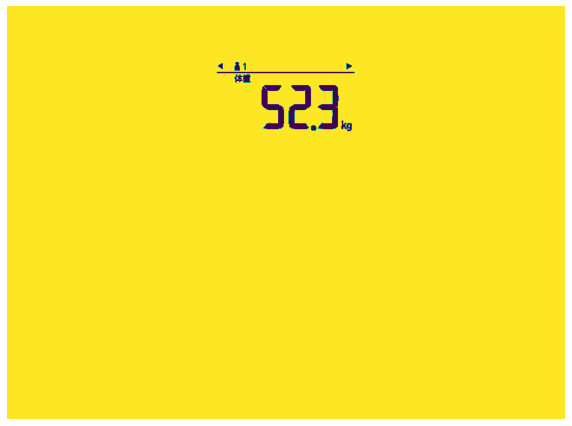

In [14]:
#ここでは二値化されてモノクロイメージになった画像を使って、上記処理を行う。

img = cv2.imread(input_file, 0)

# 閾値の設定
threshold = 100

# 二値化(閾値100を超えた画素を255にする。)
ret, img_otsu = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

# 二値化(二値化を自動で判断させる場合）
#ret2, img_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

# 二値化画像の表示
plt.figure(figsize=[10,10])
plt.axis('off')
plt.imshow(img_otsu)

output_file='/content/photo_out.jpg'
img = cv2.imwrite(output_file, 0)

In [15]:
#Google cloud visionで上記画像を判断させる。

client = vision.ImageAnnotatorClient()
with io.open(output_file, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)
response = client.document_text_detection(image=image)

print(response.text_annotations[0].description)

IndexError: ignored